## MELI - TRAMA - Problem Solving with Data

In [1]:
import pandas as pd #importo la librería para trabajar con datos
import numpy as np #importo la librería para procesar matrices
from matplotlib import pyplot as plt #importo las librerías para graficar

In [2]:
!ls dataset_tp1p2 #veo que hay en el directorio donde guardo los datos

usuariosapp.csv


In [3]:
usuarios=pd.read_csv('./dataset_tp1p2/usuariosapp.csv',sep=';') #cargo un pandas dataframe con la info del archivo

In [4]:
len(usuarios)

199826

In [5]:
usuarios.count()

UserID    199826
Status    199826
Sexo      139980
DNI       103883
dtype: int64

In [6]:
199826-103883

95943

In [7]:
usuarios.head(5) #veo que hay en los primeros 5 registros del dataframe

,UserID,Status,Sexo,DNI
0,1124,A,F,93834031
1,1199,A,F,NaN
2,1420,A,NaN,NaN
3,1684,I,M,5001415
4,1713,A,M,NaN


In [8]:
usuarios.count() #veo cuantos registros hay en el dataframe

UserID    199826
Status    199826
Sexo      139980
DNI       103883
dtype: int64

In [9]:
usuarios.dtypes #veo los tipos de cada columna

UserID     int64
Status    object
Sexo      object
DNI       object
dtype: object

In [10]:
usuarios.Status.unique() #veo que hay en status

array(['A', 'I'], dtype=object)

In [11]:
usuarios.Sexo.unique() #veo que hay en Sexo

array(['F', nan, 'M'], dtype=object)

In [12]:
usuarios.DNI.head(20) #veo que valores hay en DNI

0     93834031
1          NaN
2          NaN
3      5001415
4          NaN
5      5001495
6      5001851
7      5002808
8          NaN
9          NaN
10     5003335
11         NaN
12     5003864
13     5003873
14     5003958
15     5004539
16         NaN
17     5004972
18    94200224
19     5005341
Name: DNI, dtype: object

In [13]:
#Veamos el tipo de datos del primer registro
print(usuarios.DNI[0])
print('El tipo de datos es ' , type(usuarios.DNI[0]))

93834031
El tipo de datos es  <class 'str'>


In [14]:
#Intento transforma la columna DNI a números
pd.to_numeric(usuarios.DNI)

ValueError: Unable to parse string "L2000-1325" at position 64

In [15]:
#veamos que hay en la posición 64
usuarios.iloc[64]

UserID         18144
Status             I
Sexo               F
DNI       L2000-1325
Name: 64, dtype: object

In [16]:
#Veamos cuántos registros contienen alguna letra
np.sum(usuarios['DNI'].str.contains('[a-zA-Z]').dropna())

943

In [17]:
#Veamos que hay en las columnas nulas
usuarios[usuarios['DNI'].str.contains('[a-zA-Z]').fillna(False)]

,UserID,Status,Sexo,DNI
64,18144,I,F,L2000-1325
99,26686,A,F,L2001-1299
118,32289,I,NaN,L2001-1250
133,36481,A,NaN,L2000-924
219,58268,A,M,L2000-1101
...,...,...,...,...
199297,49867291,A,NaN,L2000-1013
199398,49891334,I,M,L2001-1154
199643,49955007,A,M,L2000-1067
199746,49980514,I,M,L2001-1072


In [18]:
#Nos quedamos con los que no tienen texto en DNI
usuarios_tf=usuarios[~usuarios['DNI'].str.contains('[a-zA-Z]').fillna(False)]

In [19]:
#Me quedo con los que no tienen nulos en DNI
usuarios_tf=usuarios_tf.dropna(subset=['DNI'])

In [20]:
usuarios_tf.DNI=pd.to_numeric(usuarios_tf.DNI) #convierto DNI a número
usuarios_tf.Status=usuarios_tf.Status.convert_dtypes() #convierto Status a string
usuarios_tf.Sexo=usuarios_tf.Sexo.convert_dtypes() #convierto Sexo a string

In [21]:
#Verifico los tipos de datos
usuarios_tf.dtypes

UserID     int64
Status    string
Sexo      string
DNI        int64
dtype: object

In [22]:
#Conteo por columnas, veo que en Sexo hay varios nulos
usuarios_tf.count()

UserID    102940
Status    102940
Sexo       72039
DNI       102940
dtype: int64

In [23]:
#Elimino la columna sexo porque el tp no requiere nada con esa variable
usuarios_tf.drop('Sexo',axis=1,inplace=True)

In [24]:
usuarios_tf.count()

UserID    102940
Status    102940
DNI       102940
dtype: int64

In [25]:
#¿Quedaron nulos?
np.sum(usuarios_tf.isna())

UserID    0
Status    0
DNI       0
dtype: int64

In [26]:
#¿cuántos DNI mayores a 90 millones hay?
np.sum(usuarios_tf.DNI>90000000)

3030

In [27]:
#Nos quedamos con los usuarios que no tienen DNI extranjero y con aquellos usuarios que están activos
usuarios_tf=usuarios_tf[usuarios_tf.DNI<90000000]
usuarios_tf=usuarios_tf[usuarios_tf.Status=='A']

In [28]:
#Vemos como nos quedo la base de datos
usuarios_tf.count()

UserID    60184
Status    60184
DNI       60184
dtype: int64

In [29]:
#Calculamos edades
usuarios_tf['Edades']=-0.0000014545*usuarios_tf.DNI+81.3217765310

In [30]:
#Redondeamos a 0 decimales
usuarios_tf.Edades=usuarios_tf.Edades.round(decimals=0)

In [31]:
#Convertimos la columna a enteros
usuarios_tf['Edades']=usuarios_tf['Edades'].astype(np.int64)

In [32]:
#Veamos como quedaron los tipos de las columnas
usuarios_tf.dtypes

UserID     int64
Status    string
DNI        int64
Edades     int64
dtype: object

In [33]:
usuarios_tf.describe()

,UserID,DNI,Edades
count,6.018400e+04,6.018400e+04,60184.000000
mean,2.510085e+07,2.608515e+07,43.381081
std,1.443366e+07,1.212449e+07,17.638812
min,1.780000e+03,5.001495e+06,13.000000
25%,1.255413e+07,1.554571e+07,28.000000
50%,2.515911e+07,2.613414e+07,43.000000
75%,3.762991e+07,3.660985e+07,59.000000
max,4.999886e+07,4.700000e+07,74.000000


In [34]:
#Armamos rangos de edad
usuarios_tf['rango_edad']=np.select(
    [
        usuarios_tf['Edades'].between(0, 19, inclusive=True), 
        usuarios_tf['Edades'].between(20, 24, inclusive=True),
        usuarios_tf['Edades'].between(25, 29, inclusive=True),
        usuarios_tf['Edades'].between(30, 34, inclusive=True),
        usuarios_tf['Edades'].between(35, 39, inclusive=True),
        usuarios_tf['Edades'].between(40, 44, inclusive=True),
        usuarios_tf['Edades'].between(45, 49, inclusive=True),
        usuarios_tf['Edades'].between(50, 54, inclusive=True),
        usuarios_tf['Edades'].between(55, 59, inclusive=True),
        usuarios_tf['Edades'].between(60, 64, inclusive=True),
        usuarios_tf['Edades'].between(65, 69, inclusive=True),
        usuarios_tf['Edades'].between(70, 74, inclusive=True),
        usuarios_tf['Edades'].between(76, 2000, inclusive=True)
    ],
    [
        '<20', 
        '20-25',
        '25-30',
        '30-35',
        '35-40',
        '40-45',
        '45-50',
        '50-55',
        '55-60',
        '60-65',
        '65-70',
        '70-75',
        '75'        
    ], 
    default='Unknown'
)

In [35]:
#Armamos una tabla pivot
pd.pivot_table(usuarios_tf,values='Edades',index=['rango_edad'],aggfunc='count')

,Edades
rango_edad,
20-25,4968
25-30,4979
30-35,4955
35-40,4987
40-45,4868
45-50,4869
50-55,4916
55-60,4916
60-65,4944


In [36]:
#Exportamos los resultados a un excel para graficar
usuarios_tf.to_excel('test.xlsx')

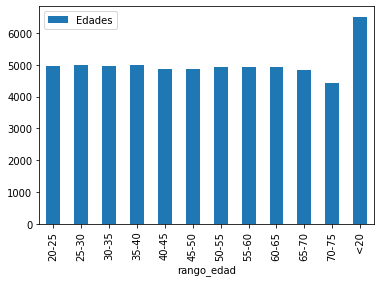

In [37]:
#Armamos una tabla pivot
pd.pivot_table(usuarios_tf,values='Edades',index=['rango_edad'],aggfunc='count').plot(kind='bar')